<b>Predicting Numbers Using the Random Forest<b>

In [1]:
import numpy as np
import random
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import cv2

Now we are going to import the MNIST dataset:


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In the last line of the code, we are loading the data in x_train, which is the training
set (60,000 examples of digits), y_train, which are the labels of those digits,
x_test, which is the testing set, and y_test, which are the corresponding labels.
These are in NumPy format.

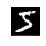

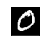

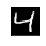

In [3]:
#Let's show some of those digits using Matplotlib:
for idx in range(3): 
    rnd_index = random.randint(0, 59999)
    plt.subplot(1,10,idx+1),plt.imshow(x_train[idx],'gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.
shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
print ("Applying RandomForest...")
model_randomforest = RandomForestClassifier(n_estimators=100)
model_randomforest.fit(x_train, y_train)

Applying RandomForest...


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
y_pred = model_randomforest.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 96.85000000000001


In [10]:
print ("Applying Adaboost...")
adaboost = AdaBoostClassifier(model_randomforest,n_estimators=11)
adaboost.fit(x_train, y_train)

Applying Adaboost...


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [11]:
y_pred = adaboost.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 96.77
